# Introduction
## Before you begin
Please ensure you have referred to Esther-Setup.ipynb in the repository and have properly setup your environment.

# Setting up the environment
This first cell sets up the Text-Fabric.

You will notice it also sets up various other environments to assist in the data visualization.

The cell installs is the Hebrew Bible (BHS).

Due to the limits of the Github download size, you may wish to install the rest of the biblele one by one by selectively removing the hastag (#) sign before the command line. You only have to download the bible once onto your machine, but there are limits to the download per hour placed by Github.

The other Bibles that may be downloaded are the Greek Bible (Nestle Aland 1904), the Septuagint (LXX), and the Dead Sea Scrolls (DSS).

If you are unable to install the bible in the terminal tab of the Jupyter program or app, you may wish to run the following terminal commands ONE AT A TIME:

cd

pip3 install 'text-fabric[all]'

pip3 install --upgrade text-fabric

cd text-fabric-data

git clone https://github.com/ETCBC/bhsa

git clone https://github.com/CenterBLC/BHSaddons

git clone https://github.com/ETCBC/dss

git clone https://github.com/CenterBLC/LXX

git clone https://github.com/CenterBLC/N1904



In [1]:
!pip3 install 'text-fabric[all]'
!pip3 install --upgrade text-fabric
!pip3 install pandas 
!pip3 install numpy 
!pip3 install scipy 
!pip3 install matplotlib 
!pip3 install plotly
from pathlib import Path
import json, math
from collections import Counter
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import sys, os, collections
import seaborn as sns
from tf.fabric import Fabric
from tf.app import use
from matplotlib.pyplot import figure
from collections import Counter
BHS = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf', hoist=globals())
bhsF, bhsL, bhsT, bhsS = BHS.api.F, BHS.api.L, BHS.api.T, BHS.api.S

LXX = use("CenterBLC/LXX", version="1935", hoist=globals())
lxxF, lxxL, lxxT, lxxS = LXX.api.F, LXX.api.L, LXX.api.T, LXX.api.S

DSS = use('etcbc/dss', hoist=globals())
dssF, dssL, dssT, dssS = DSS.api.F, DSS.api.L, DSS.api.T, DSS.api.S

GNT = use ("CenterBLC/N1904", version="1.0.0", mod="CenterBLC/N1904/BOLcomplement/tf/", hoist=globals())
gntF, gntL, gntT, gntS = GNT.api.F, GNT.api.L, GNT.api.T, GNT.api.S


**Locating corpus resources ...**

**Locating corpus resources ...**

**Locating corpus resources ...**

**Locating corpus resources ...**

Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

# The following cells will provide examples of what you can do within the Text-Fabric environment

## Visual representation of wayyiqtol verbs compared with X-qatal occurences
This sets up the occurences of wayyiqtol (green) against the X-qatal verbs (orange) in Esther.

The first cell searches for all the wayyiqtol occurneces in Esther.

In [2]:
EstherWayyiqtolSearch = '''
chapter book=Esther
   clause typ=WayX
'''
EstherWayyiqtolSearch  = BHS.search(EstherWayyiqtolSearch)
BHS.table(EstherWayyiqtolSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)


  0.05s 92 results


We then search for all the X-qatal occurneces in Esther

In [3]:
EstherxQtXSearch = '''
chapter book=Esther
   clause typ=xQtX
'''
EstherxQtXSearch  = BHS.search(EstherxQtXSearch)
BHS.table(EstherxQtXSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.03s 40 results


We then export the data to their respective .tsv files

In [4]:
BHS.export(EstherWayyiqtolSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='EstherWayyiqtolSearch.tsv')

In [5]:
BHS.export(EstherxQtXSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='EstherxQtXSearch.tsv')

In [6]:
EstherWayyiqtolSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/EstherWayyiqtolSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
EstherWayyiqtolSearch.head(11)

R      S1  S2  S3   NODE1    TYPE1   book1   NODE2   TYPE2  \
0    1  Esther   1  12  427449  chapter  Esther  505306  clause   
1    2  Esther   1  12  427449  chapter  Esther  505309  clause   
2    3  Esther   1  13  427449  chapter  Esther  505311  clause   
3    4  Esther   1  16  427449  chapter  Esther  505319  clause   
4    5  Esther   1  21  427449  chapter  Esther  505343  clause   
5    6  Esther   1  21  427449  chapter  Esther  505344  clause   
6    7  Esther   2   2  427450  chapter  Esther  505354  clause   
7    8  Esther   2   4  427450  chapter  Esther  505361  clause   
8    9  Esther   2   8  427450  chapter  Esther  505377  clause   
9   10  Esther   2   9  427450  chapter  Esther  505378  clause   
10  11  Esther   2  15  427450  chapter  Esther  505413  clause   

                                                TEXT2  typ2  
0                ◊ï÷∑◊™÷º÷∞◊û÷∏◊ê÷µ÷û◊ü ◊î÷∑◊û÷º÷∑◊ú÷∞◊õ÷º÷∏÷£◊î ◊ï÷∑◊©◊Å÷∞◊™÷º÷¥÷ó◊ô   WayX  
1                     ◊ï÷∑◊ô÷º÷¥◊ß÷∞◊¶÷π÷§◊£ ◊î÷∑◊û÷º÷∂÷®◊ú÷∂◊ö÷∞÷ô ◊û÷∞◊ê÷π÷î◊ì   WayX  
2   ◊ï÷∑◊ô÷º÷π÷£◊ê◊û÷∂◊® ◊î÷∑◊û÷º÷∂÷î◊ú÷∂◊ö÷∞ ◊ú÷∑◊ó÷≤◊õ÷∏◊û÷¥÷ñ◊ô◊ù ◊ô÷π◊ì÷∞◊¢÷µ÷£◊ô ◊î÷∏÷Ω...  WayX  
3   ◊ï÷∑◊ô÷º÷π÷£◊ê◊û÷∂◊® ◊û÷∞◊û◊ï÷º◊õ÷∏÷ó◊ü ◊ú÷¥◊§÷∞◊†÷µ÷§◊ô ◊î÷∑◊û÷º÷∂÷®◊ú÷∂◊ö÷∞÷ô ◊ï÷∞◊î÷∑...  WayX  
4   ◊ï÷∑◊ô÷º÷¥◊ô◊ò÷∑◊ë÷ô ◊î÷∑◊ì÷º÷∏◊ë÷∏÷î◊® ◊ë÷º÷∞◊¢÷µ◊ô◊†÷µ÷•◊ô ◊î÷∑◊û÷º÷∂÷ñ◊ú÷∂◊ö÷∞ ◊ï÷∞◊î...  WayX  
5         ◊ï÷∑◊ô÷º÷∑÷•◊¢÷∑◊©◊Ç ◊î÷∑◊û÷º÷∂÷ñ◊ú÷∂◊ö÷∞ ◊õ÷º÷¥◊ì÷∞◊ë÷∑÷•◊® ◊û÷∞◊û◊ï÷º◊õ÷∏÷Ω◊ü◊É   WayX  
6      ◊ï÷∑◊ô÷º÷π◊ê◊û÷∞◊®÷•◊ï÷º ◊†÷∑◊¢÷≤◊®÷µ÷Ω◊ô÷æ◊î÷∑◊û÷º÷∂÷ñ◊ú÷∂◊ö÷∞ ◊û÷∞◊©◊Å÷∏◊®÷∞◊™÷∏÷ë◊ô◊ï   WayX  
7         ◊ï÷∑◊ô÷º÷¥◊ô◊ò÷∑÷ß◊ë ◊î÷∑◊ì÷º÷∏◊ë÷∏÷õ◊® ◊ë÷º÷∞◊¢÷µ◊ô◊†÷µ÷•◊ô ◊î÷∑◊û÷º÷∂÷ñ◊ú÷∂◊ö÷∞   WayX  
8   ◊ï÷∑◊™÷º÷¥◊ú÷º÷∏◊ß÷∑÷§◊ó ◊ê÷∂◊°÷∞◊™÷º÷µ◊®÷ô ◊ê÷∂◊ú÷æ◊ë÷º÷µ÷£◊ô◊™ ◊î÷∑◊û÷º÷∂÷î◊ú÷∂◊ö÷∞ ◊ê...  WayX  
9                  ◊ï÷∑◊™÷º÷¥◊ô◊ò÷∑÷®◊ë ◊î÷∑◊†÷º÷∑◊¢÷≤◊®÷∏÷£◊î ◊ë÷∞◊¢÷µ◊ô◊†÷∏◊ô◊ï÷Æ   WayX  
10  ◊ï÷∑◊™÷º÷∞◊î÷¥÷§◊ô ◊ê÷∂◊°÷∞◊™÷º÷µ◊®÷ô ◊†÷π◊©◊Ç÷µ÷£◊ê◊™ ◊ó÷µ÷î◊ü ◊ë÷º÷∞◊¢÷µ◊ô◊†÷µ÷ñ◊ô ◊õ...  WayX

In [7]:
EstherxQtXSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/EstherxQtXSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
EstherxQtXSearch.head(11)

R      S1  S2  S3   NODE1    TYPE1   book1   NODE2   TYPE2  \
0    1  Esther   1   8  427449  chapter  Esther  505296  clause   
1    2  Esther   1  16  427449  chapter  Esther  505320  clause   
2    3  Esther   2   6  427450  chapter  Esther  505368  clause   
3    4  Esther   2  10  427450  chapter  Esther  505385  clause   
4    5  Esther   2  14  427450  chapter  Esther  505405  clause   
5    6  Esther   2  20  427450  chapter  Esther  505426  clause   
6    7  Esther   2  21  427450  chapter  Esther  505429  clause   
7    8  Esther   3   1  427451  chapter  Esther  505440  clause   
8    9  Esther   3   2  427451  chapter  Esther  505447  clause   
9   10  Esther   3  12  427451  chapter  Esther  505497  clause   
10  11  Esther   4   7  427452  chapter  Esther  505550  clause   

                                                TEXT2  typ2  
0   ◊õ÷º÷¥◊ô÷æ◊õ÷µ÷£◊ü◊Ä ◊ô÷¥◊°÷º÷∑÷£◊ì ◊î÷∑◊û÷º÷∂÷ó◊ú÷∂◊ö÷∞ ◊¢÷ö÷∑◊ú ◊õ÷º÷∏◊ú÷æ◊®÷∑÷£◊ë ◊ë...  xQtX  
1   ◊ú÷π÷§◊ê ◊¢÷∑◊ú÷æ◊î÷∑◊û÷º÷∂÷®◊ú÷∂◊ö÷∞÷ô ◊ú÷∞◊ë÷∑◊ì÷º÷π÷î◊ï ◊¢÷∏◊ï÷∞◊™÷∏÷ñ◊î ◊ï÷∑◊©◊Å÷∞◊™...  xQtX  
2   ◊ê÷≤◊©◊Å÷∂÷£◊® ◊î÷∂◊í÷∞◊ú÷∏÷î◊î ◊†÷∞◊ë◊ï÷º◊õ÷∑◊ì÷∞◊†÷∂◊ê◊¶÷º÷∑÷ñ◊® ◊û÷∂÷•◊ú÷∂◊ö÷∞ ◊ë÷º÷∏...  xQtX  
3   ◊ú÷π◊ê÷æ◊î÷¥◊í÷º÷¥÷£◊ô◊ì÷∏◊î ◊ê÷∂◊°÷∞◊™÷º÷µ÷î◊® ◊ê÷∂◊™÷æ◊¢÷∑◊û÷º÷∏÷ñ◊î÷º ◊ï÷∞◊ê÷∂◊™÷æ◊û÷π...  xQtX  
4                 ◊õ÷º÷¥÷£◊ô ◊ê÷¥◊ù÷æ◊ó÷∏◊§÷µ÷•◊• ◊ë÷º÷∏÷õ◊î÷º ◊î÷∑◊û÷º÷∂÷ñ◊ú÷∂◊ö÷∞   xQtX  
5            ◊õ÷º÷∑◊ê÷≤◊©◊Å÷∂÷õ◊® ◊¶÷¥◊ï÷º÷∏÷•◊î ◊¢÷∏◊ú÷∂÷ñ◊ô◊î÷∏ ◊û÷∏◊®÷∞◊ì÷º÷≥◊õ÷∏÷ë◊ô   xQtX  
6   ◊ë÷º÷∑◊ô÷º÷∏◊û÷¥÷£◊ô◊ù ◊î÷∏◊î÷µ÷î◊ù ◊ß÷∏◊¶÷∑◊£÷© ◊ë÷º÷¥◊í÷∞◊™÷∏÷®◊ü ◊ï÷∏◊™÷∂÷ú◊®÷∂◊©◊Å ...  xQtX  
7   ◊ê÷∑◊ó÷∑÷£◊®◊Ä ◊î÷∑◊ì÷º÷∞◊ë÷∏◊®÷¥÷£◊ô◊ù ◊î÷∏◊ê÷µ÷ó◊ú÷º÷∂◊î ◊í÷º÷¥◊ì÷º÷∑◊ú÷© ◊î÷∑◊û÷º÷∂÷®...  xQtX  
8                   ◊õ÷º÷¥◊ô÷æ◊õ÷µ÷ñ◊ü ◊¶÷¥◊ï÷º÷∏◊î÷æ◊ú÷π÷£◊ï ◊î÷∑◊û÷º÷∂÷ë◊ú÷∂◊ö÷∞   xQtX  
9                              ◊ê÷≤◊©◊Å÷∂◊®÷æ◊¶÷¥◊ï÷º÷∏÷£◊î ◊î÷∏◊û÷∏÷°◊ü   xQtX  
10                             ◊ê÷≤◊©◊Å÷∂÷®◊® ◊ê÷∏◊û÷∑÷§◊® ◊î÷∏◊û÷∏◊ü÷ô   xQtX

Next, we form two dataframes. The first dataframe, df1 will contain the results of the wayyiqtol search and a second dataframe, df2 will contain the search results for the X-qatal occurences.

In [8]:

# Example: if df1 and df2 are CSVs
df1 = EstherWayyiqtolSearch
df2 = EstherxQtXSearch

# Add source column
df1["source"] = "EstherWayyiqtolSearch"
df2["source"] = "EstherXQtXSearch"

# Combine into one DataFrame
combined_df = pd.concat([df1, df2], ignore_index=True)

# (Optional) check the result
print(combined_df.head())

   R      S1  S2  S3   NODE1    TYPE1   book1   NODE2   TYPE2  \
0  1  Esther   1  12  427449  chapter  Esther  505306  clause   
1  2  Esther   1  12  427449  chapter  Esther  505309  clause   
2  3  Esther   1  13  427449  chapter  Esther  505311  clause   
3  4  Esther   1  16  427449  chapter  Esther  505319  clause   
4  5  Esther   1  21  427449  chapter  Esther  505343  clause   

                                               TEXT2  typ2  \
0               ◊ï÷∑◊™÷º÷∞◊û÷∏◊ê÷µ÷û◊ü ◊î÷∑◊û÷º÷∑◊ú÷∞◊õ÷º÷∏÷£◊î ◊ï÷∑◊©◊Å÷∞◊™÷º÷¥÷ó◊ô   WayX   
1                    ◊ï÷∑◊ô÷º÷¥◊ß÷∞◊¶÷π÷§◊£ ◊î÷∑◊û÷º÷∂÷®◊ú÷∂◊ö÷∞÷ô ◊û÷∞◊ê÷π÷î◊ì   WayX   
2  ◊ï÷∑◊ô÷º÷π÷£◊ê◊û÷∂◊® ◊î÷∑◊û÷º÷∂÷î◊ú÷∂◊ö÷∞ ◊ú÷∑◊ó÷≤◊õ÷∏◊û÷¥÷ñ◊ô◊ù ◊ô÷π◊ì÷∞◊¢÷µ÷£◊ô ◊î÷∏÷Ω...  WayX   
3  ◊ï÷∑◊ô÷º÷π÷£◊ê◊û÷∂◊® ◊û÷∞◊û◊ï÷º◊õ÷∏÷ó◊ü ◊ú÷¥◊§÷∞◊†÷µ÷§◊ô ◊î÷∑◊û÷º÷∂÷®◊ú÷∂◊ö÷∞÷ô ◊ï÷∞◊î÷∑...  WayX   
4  ◊ï÷∑◊ô÷º÷¥◊ô◊ò÷∑◊ë÷ô ◊î÷∑◊ì÷º÷∏◊ë÷∏÷î◊® ◊ë÷º÷∞◊¢÷µ◊ô◊†÷µ÷•◊ô ◊î÷∑◊û÷º÷∂÷ñ◊ú÷∂◊ö÷∞ ◊ï÷∞◊î...  WayX   

                  source  
0  EstherWayyiqtolSear

An "lmplot" is then constructed showing the results with the wayyiqtols occurences appearing in green and the X-qatal occurences in orange.

Text(0.5, 33.99999999999999, 'Chapters in Esther')

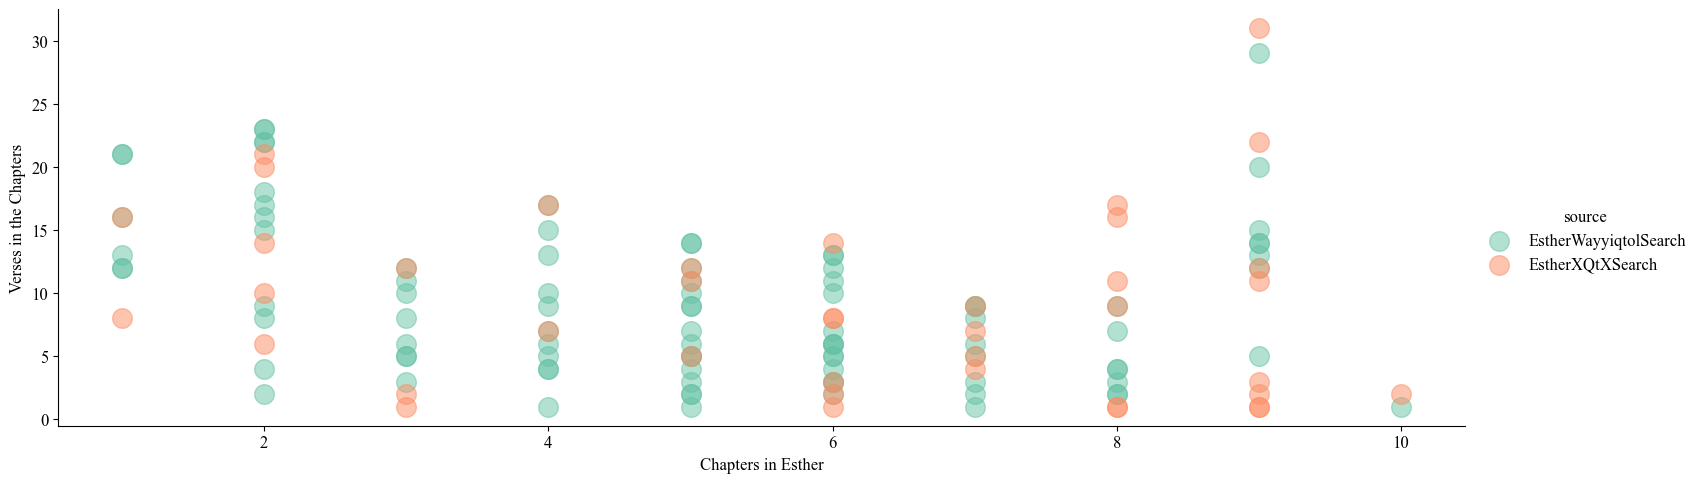

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font family to Times New Roman and font size to 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12

sns.lmplot(data=combined_df, x="S2", y="S3", hue="source", height=5, aspect=9/3, fit_reg=False, scatter_kws={"s": 200, "alpha":0.5}, palette="Set2")
ax = plt.gca()
ax.set_ylabel('Verses in the Chapters')
ax.set_xlabel('Chapters in Esther')

## Wayyiqtol occurences in the entire Hebrew Bible
The following code lists all the occurences of a wayyiqtol in the Hebrew Bible and compares this with all the occurences of X-qatal.

It lists only the first 5 occurrences, but can be adjusted to list all the 15 reults by adjusting the last line of the  cell.

In [10]:
BHSWayyiqtolSearch = '''
verse
   clause typ=WayX
'''
BHSWayyiqtolSearch  = BHS.search(BHSWayyiqtolSearch)
BHS.table(BHSWayyiqtolSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)


  0.05s 5893 results


In [11]:
BHSxQtXSearch = '''
verse
   clause typ=xQtX
'''
BHSxQtXSearch  = BHS.search(BHSxQtXSearch)
BHS.table(BHSxQtXSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.04s 2796 results


In [12]:
BHS.export(BHSWayyiqtolSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='BHSWayyiqtolSearch.tsv')
BHS.export(BHSxQtXSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='BHSxQtXSearch.tsv')

In [13]:
BHSWayyiqtolSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/BHSWayyiqtolSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSWayyiqtolSearch.head(5)

R       S1  S2  S3    NODE1  TYPE1  \
0  1  Genesis   1   3  1414391  verse   
1  2  Genesis   1   3  1414391  verse   
2  3  Genesis   1   4  1414392  verse   
3  4  Genesis   1   4  1414392  verse   
4  5  Genesis   1   5  1414393  verse   

                                               TEXT1   NODE2   TYPE2  \
0  ◊ï÷∑◊ô÷º÷π÷•◊ê◊û÷∂◊® ◊ê÷±◊ú÷π◊î÷¥÷ñ◊ô◊ù ◊ô÷∞◊î÷¥÷£◊ô ◊ê÷π÷ë◊ï◊® ◊ï÷∑÷Ω◊ô÷∞◊î÷¥◊ô÷æ◊ê÷π÷Ω...  427563  clause   
1  ◊ï÷∑◊ô÷º÷π÷•◊ê◊û÷∂◊® ◊ê÷±◊ú÷π◊î÷¥÷ñ◊ô◊ù ◊ô÷∞◊î÷¥÷£◊ô ◊ê÷π÷ë◊ï◊® ◊ï÷∑÷Ω◊ô÷∞◊î÷¥◊ô÷æ◊ê÷π÷Ω...  427565  clause   
2  ◊ï÷∑◊ô÷º÷∑÷ß◊®÷∞◊ê ◊ê÷±◊ú÷π◊î÷¥÷õ◊ô◊ù ◊ê÷∂◊™÷æ◊î÷∏◊ê÷π÷ñ◊ï◊® ◊õ÷º÷¥◊ô÷æ◊ò÷π÷ë◊ï◊ë ◊ï÷∑◊ô...  427566  clause   
3  ◊ï÷∑◊ô÷º÷∑÷ß◊®÷∞◊ê ◊ê÷±◊ú÷π◊î÷¥÷õ◊ô◊ù ◊ê÷∂◊™÷æ◊î÷∏◊ê÷π÷ñ◊ï◊® ◊õ÷º÷¥◊ô÷æ◊ò÷π÷ë◊ï◊ë ◊ï÷∑◊ô...  427568  clause   
4  ◊ï÷∑◊ô÷º÷¥◊ß÷∞◊®÷∏÷®◊ê ◊ê÷±◊ú÷π◊î÷¥÷§◊ô◊ù◊Ä ◊ú÷∏◊ê÷π◊ï◊®÷ô ◊ô÷π÷î◊ï◊ù ◊ï÷∞◊ú÷∑◊ó÷π÷ñ◊©◊Å...  427569  clause   

                                               TEXT2  typ2  
0                              ◊ï÷∑◊ô÷º÷π÷•◊ê◊û÷∂◊® ◊ê÷±◊ú÷π◊î÷¥÷ñ◊ô◊ù   WayX  
1                                   ◊ï÷∑÷Ω◊ô÷∞◊î÷¥◊ô÷æ◊ê÷π÷Ω◊ï◊®◊É   WayX  
2                   ◊ï÷∑◊ô÷º÷∑÷ß◊®÷∞◊ê ◊ê÷±◊ú÷π◊î÷¥÷õ◊ô◊ù ◊ê÷∂◊™÷æ◊î÷∏◊ê÷π÷ñ◊ï◊®   WayX  
3  ◊ï÷∑◊ô÷º÷∑◊ë÷∞◊ì÷º÷µ÷£◊ú ◊ê÷±◊ú÷π◊î÷¥÷î◊ô◊ù ◊ë÷º÷µ÷•◊ô◊ü ◊î÷∏◊ê÷π÷ñ◊ï◊® ◊ï÷º◊ë÷µ÷•◊ô◊ü ...  WayX  
4              ◊ï÷∑◊ô÷º÷¥◊ß÷∞◊®÷∏÷®◊ê ◊ê÷±◊ú÷π◊î÷¥÷§◊ô◊ù◊Ä ◊ú÷∏◊ê÷π◊ï◊®÷ô ◊ô÷π÷î◊ï◊ù   WayX

In [14]:
BHSxQtXSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/BHSxQtXSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSxQtXSearch.head(5)

R       S1  S2  S3    NODE1  TYPE1  \
0  1  Genesis   1   1  1414389  verse   
1  2  Genesis   1  21  1414409  verse   
2  3  Genesis   2   3  1414422  verse   
3  4  Genesis   2   5  1414424  verse   
4  5  Genesis   2  23  1414442  verse   

                                               TEXT1   NODE2   TYPE2  \
0  ◊ë÷º÷∞◊®÷µ◊ê◊©◊Å÷¥÷ñ◊ô◊™ ◊ë÷º÷∏◊®÷∏÷£◊ê ◊ê÷±◊ú÷π◊î÷¥÷ë◊ô◊ù ◊ê÷µ÷•◊™ ◊î÷∑◊©◊Å÷º÷∏◊û÷∑÷ñ◊ô...  427559  clause   
1  ◊ï÷∑◊ô÷º÷¥◊ë÷∞◊®÷∏÷£◊ê ◊ê÷±◊ú÷π◊î÷¥÷î◊ô◊ù ◊ê÷∂◊™÷æ◊î÷∑◊™÷º÷∑◊†÷º÷¥◊ô◊†÷¥÷ñ◊ù ◊î÷∑◊í÷º÷∞◊ì...  427632  clause   
2  ◊ï÷∑◊ô÷∞◊ë÷∏÷§◊®÷∂◊ö÷∞ ◊ê÷±◊ú÷π◊î÷¥◊ô◊ù÷ô ◊ê÷∂◊™÷æ◊ô÷π÷£◊ï◊ù ◊î÷∑◊©◊Å÷º÷∞◊ë÷¥◊ô◊¢÷¥÷î◊ô ...  427693  clause   
3  ◊ï÷∞◊õ÷π÷£◊ú◊Ä ◊©◊Ç÷¥÷£◊ô◊ó÷∑ ◊î÷∑◊©◊Ç÷º÷∏◊ì÷∂÷ó◊î ◊ò÷ö÷∂◊®÷∂◊ù ◊ô÷¥÷Ω◊î÷∞◊ô÷∂÷£◊î ◊ë÷∏...  427701  clause   
4  ◊ï÷∑◊ô÷º÷π◊ê◊û÷∂◊®÷Æ ◊î÷∏÷Ω◊ê÷∏◊ì÷∏◊ù÷í ◊ñ÷π÷£◊ê◊™ ◊î÷∑◊§÷º÷∑÷ó◊¢÷∑◊ù ◊¢÷ö÷∂◊¶÷∂◊ù ◊û÷µ...  427769  clause   

                                               TEXT2  typ2  
0  ◊ë÷º÷∞◊®÷µ◊ê◊©◊Å÷¥÷ñ◊ô◊™ ◊ë÷º÷∏◊®÷∏÷£◊ê ◊ê÷±◊ú÷π◊î÷¥÷ë◊ô◊ù ◊ê÷µ÷•◊™ ◊î÷∑◊©◊Å÷º÷∏◊û÷∑÷ñ◊ô...  xQtX  
1                       ◊ê÷≤◊©◊Å÷∂◊®÷© ◊©◊Å÷∏◊®÷∞◊¶÷®◊ï÷º ◊î÷∑◊û÷º÷∑÷ú◊ô÷¥◊ù   xQtX  
2                          ◊ê÷≤◊©◊Å÷∂◊®÷æ◊ë÷º÷∏◊®÷∏÷•◊ê ◊ê÷±◊ú÷π◊î÷¥÷ñ◊ô◊ù   xQtX  
3  ◊õ÷º÷¥◊ô÷© ◊ú÷π÷®◊ê ◊î÷¥◊û÷∞◊ò÷¥÷ú◊ô◊® ◊ô÷∞◊î◊ï÷∏÷§◊î ◊ê÷±◊ú÷π◊î÷¥◊ô◊ù÷ô ◊¢÷∑◊ú÷æ◊î÷∏◊ê...  xQtX  
4                   ◊õ÷º÷¥÷•◊ô ◊û÷µ◊ê÷¥÷ñ◊ô◊©◊Å ◊ú÷ª÷Ω◊ß÷≥◊ó÷∏◊î÷æ◊ñ÷º÷π÷Ω◊ê◊™◊É   xQtX

The first visualiazation views all the wayyiqtols as they occur in the Hebrew Bible

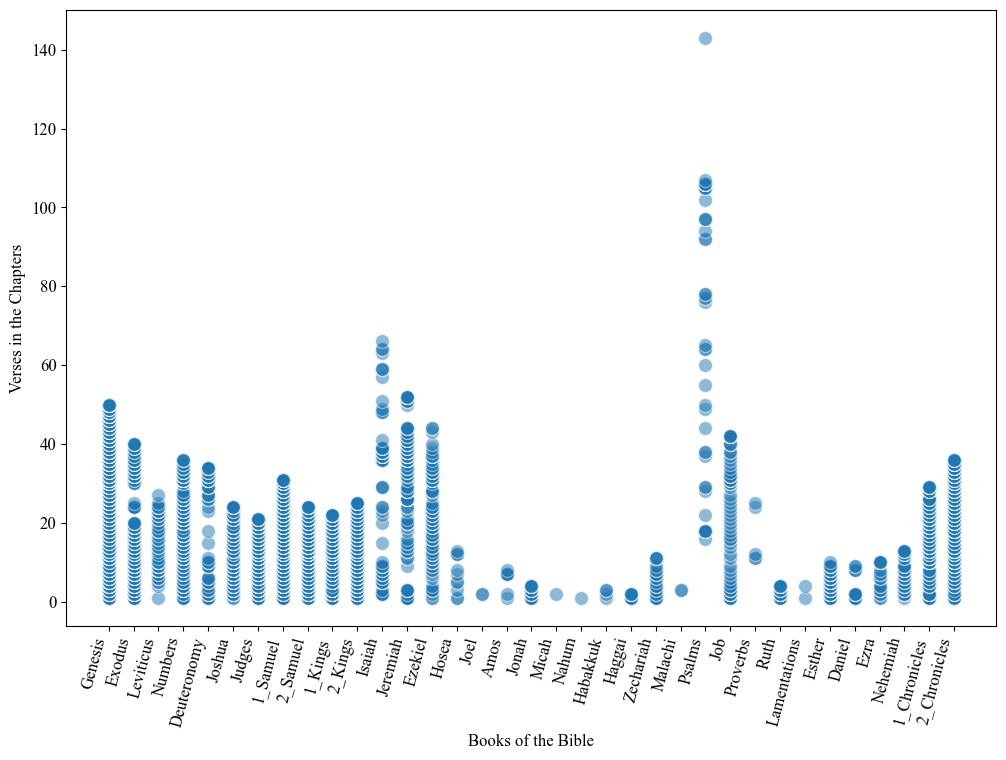

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=BHSWayyiqtolSearch, x="S1", y="S2", s=100, alpha=0.5)
plt.xticks(rotation=75, ha='right') # Rotate by 45 degrees and align to the right
plt.ylabel('Verses in the Chapters')
plt.xlabel('Books of the Bible')
plt.show()

We shall now plot both dataframes, all the wayyiqtol occurenecs with all the X-qatal occurences, into a single visualization.

In [16]:
df1 = BHSWayyiqtolSearch
df2 = BHSxQtXSearch

df1["source"]="BHSWayyiqtolSearch"
df2["source"]="BHSxQtXSearch"
combined_df=pd.concat([df1, df2])

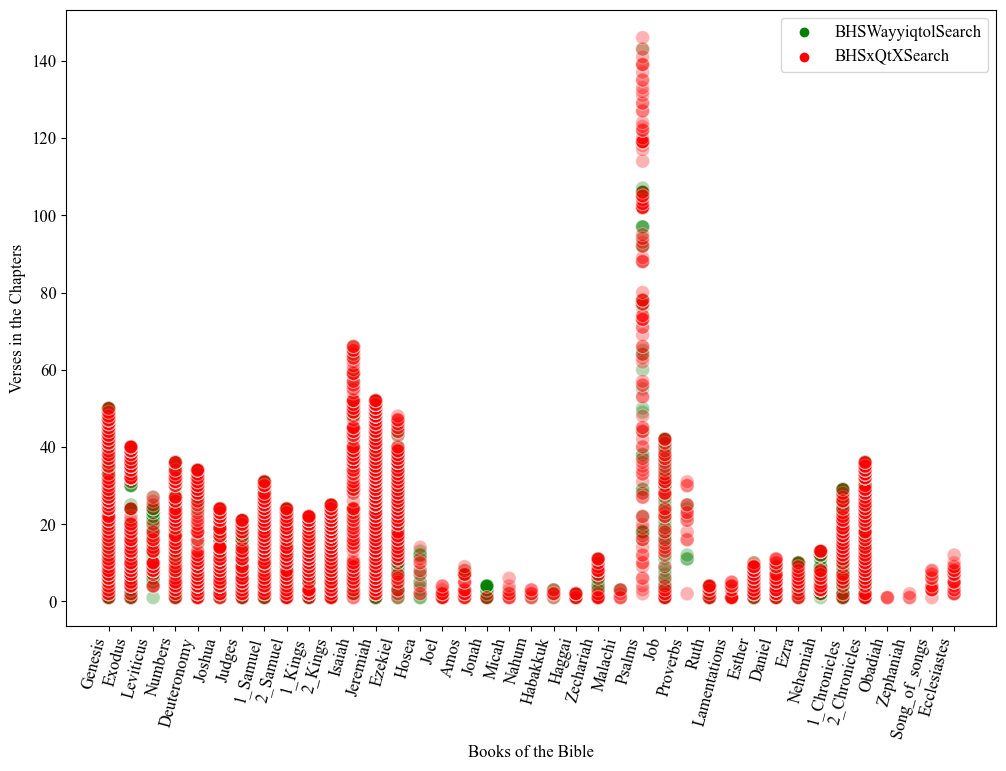

In [20]:
palette = {"Category1": "green", "Category2": "red"}
plt.figure(figsize=(12, 8))  # Increase the figure size (width=12, height=8)
sns.scatterplot(data=combined_df, x="S1", y="S2", hue="source", palette=["green", "red"], s=100, alpha=0.3)
plt.xticks(rotation=75, ha='right') # Rotate by 45 degrees and align to the right
plt.ylabel('Verses in the Chapters')
plt.xlabel('Books of the Bible')
plt.legend()
plt.show()

The last visualization demonstrates some visual tweaks that can be done for the same data.

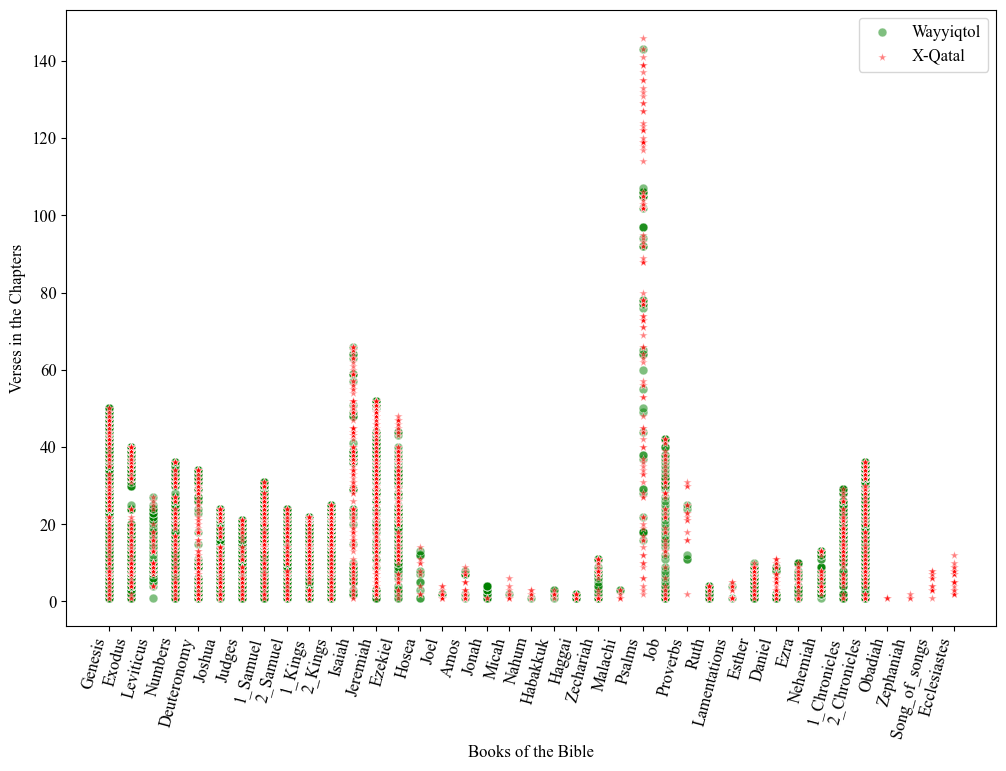

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# First dataframe (green circles)
sns.scatterplot(
    data=df1,
    x="S1",
    y="S2",
    color="green",
    marker="o",   # circle marker
    s=40,
    alpha=0.5,
    label="Wayyiqtol"
)

# Second dataframe (red triangles)
sns.scatterplot(
    data=df2,
    x="S1",
    y="S2",
    color="red",
    marker="*",   # triangle marker
    s=40,
    alpha=0.5,
    label="X-Qatal"
)

plt.xticks(rotation=75, ha='right')
plt.ylabel('Verses in the Chapters')
plt.xlabel('Books of the Bible')
plt.legend()
plt.show()